In [1]:
# References:
# https://becominghuman.ai/ensemble-learning-bagging-and-boosting-d20f38be9b1e
# https://towardsdatascience.com/adaboost-for-dummies-breaking-down-the-math-and-its-equations-into-simple-terms-87f439757dcf
# Class notes and lecture examples provide on blackboard

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import sklearn.metrics as metrics
import random
from sklearn.tree import DecisionTreeClassifier 

In [3]:
fiveRingData=pd.read_csv('E:\Local Disk D\IIT-C\Sem 4\CS 584 Machine Learning\Homeworks\Homework 5\FiveRing.csv')

fiveRingDataFrame=pd.DataFrame(fiveRingData)

In [4]:
fiveRingDataFrame.head()

,ring,x,y
0,0,0.000000,1.000000
1,0,0.001877,1.061234
2,0,0.001877,0.938766
3,0,0.002810,1.074915
4,0,0.002810,0.925085


In [5]:
trainData=fiveRingDataFrame[['x','y']].dropna()

targetVariable=fiveRingDataFrame['ring']

X=trainData

Y=targetVariable

classTree = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=20190430)


ringData_DT=classTree.fit(X,Y)

In [6]:
print(ringData_DT)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=20190430, splitter='best')


In [7]:
Accuracy=round(classTree.score(X,Y),7)

print(Accuracy)

0.5358821


In [8]:
PredictedProb=pd.DataFrame(classTree.predict_proba(X))

print(PredictedProb)

              0         1         2         3         4
0      0.194821  0.077444  0.485721  0.241893  0.000121
1      0.194821  0.077444  0.485721  0.241893  0.000121
2      0.194821  0.077444  0.485721  0.241893  0.000121
3      0.194821  0.077444  0.485721  0.241893  0.000121
4      0.194821  0.077444  0.485721  0.241893  0.000121
5      0.194821  0.077444  0.485721  0.241893  0.000121
6      0.194821  0.077444  0.485721  0.241893  0.000121
7      0.194821  0.077444  0.485721  0.241893  0.000121
8      0.194821  0.077444  0.485721  0.241893  0.000121
9      0.194821  0.077444  0.485721  0.241893  0.000121
10     0.194821  0.077444  0.485721  0.241893  0.000121
11     0.194821  0.077444  0.485721  0.241893  0.000121
12     0.194821  0.077444  0.485721  0.241893  0.000121
13     0.194821  0.077444  0.485721  0.241893  0.000121
14     0.194821  0.077444  0.485721  0.241893  0.000121
15     0.194821  0.077444  0.485721  0.241893  0.000121
16     0.194821  0.077444  0.485721  0.241893  0

In [9]:
PredictedLabel= pd.to_numeric(PredictedProb.idxmax(axis=1))

print(PredictedLabel)

0        2
1        2
2        2
3        2
4        2
5        2
6        2
7        2
8        2
9        2
10       2
11       2
12       2
13       2
14       2
15       2
16       2
17       2
18       2
19       2
20       2
21       2
22       2
23       2
24       2
25       2
26       2
27       2
28       2
29       2
        ..
19980    4
19981    4
19982    4
19983    4
19984    4
19985    4
19986    4
19987    4
19988    4
19989    4
19990    4
19991    4
19992    4
19993    4
19994    4
19995    4
19996    4
19997    4
19998    4
19999    4
20000    4
20001    4
20002    4
20003    4
20004    4
20005    4
20006    4
20007    4
20008    4
20009    4
Length: 20010, dtype: int64


In [10]:
ActualLabel=fiveRingDataFrame['ring']

Accuracy=round(metrics.accuracy_score(ActualLabel,PredictedLabel),7)

print("Accuracy: ",Accuracy)

Missclassification=round(1-Accuracy,7)

print("Missclassification",Missclassification)

Accuracy:  0.5358821
Missclassification 0.4641179


In [11]:
def RASE_NEW(predictedProb,predLabel,ring):
    total=0
    rase=0
    y1=0
    for i in range(0,predictedProb[0].shape[0]):
        pred_y = predLabel[i]
        actual_y =ring[i]
        if(actual_y==0):
            y1+= (((1 - predictedProb.iloc[i,0])**2)+((predictedProb.iloc[i,1])**2)+
                 ((predictedProb.iloc[i,2])**2)+((predictedProb.iloc[i,3])**2)+((predictedProb.iloc[i,4])**2))
        elif (actual_y==1):
            y1+= (((predictedProb.iloc[i,0])**2)+((1-predictedProb.iloc[i,1])**2)+
                 ((predictedProb.iloc[i,2])**2)+((predictedProb.iloc[i,3])**2)+((predictedProb.iloc[i,4])**2))
        elif (actual_y==2):
            y1+= (((predictedProb.iloc[i,0])**2)+((predictedProb.iloc[i,1])**2)+
                 ((1-predictedProb.iloc[i,2])**2)+((predictedProb.iloc[i,3])**2)+((predictedProb.iloc[i,4])**2))
        elif (actual_y==3):
            y1+= (((predictedProb.iloc[i,0])**2)+((predictedProb.iloc[i,1])**2)+
                 ((predictedProb.iloc[i,2])**2)+((1-predictedProb.iloc[i,3])**2)+((predictedProb.iloc[i,4])**2))
        elif (actual_y==4):
            y1+= (((predictedProb.iloc[i,0])**2)+((predictedProb.iloc[i,1])**2)+
                 ((predictedProb.iloc[i,2])**2)+((predictedProb.iloc[i,3])**2)+((1-predictedProb.iloc[i,4])**2))
    total=y1       
#     print(total)
        
    count = predictedProb[0].size * 2
    rase = np.sqrt(total/count)
    return rase  

In [12]:
print("2(b)")

RASE=RASE_NEW(PredictedProb,PredictedLabel,fiveRingDataFrame['ring'])

print("Root Average Squared Error:",round(RASE,7))

2(b)
Root Average Squared Error: 0.5507919


2(c)


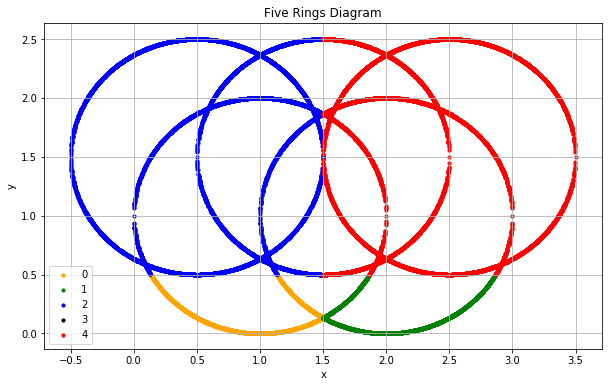

In [13]:
print("2(c)")

color=['orange','green','blue','black','red']
plt.figure(figsize=(10,6))
ring_0=np.where(PredictedLabel==0)
plt.scatter(fiveRingDataFrame.x.iloc[ring_0[0]],fiveRingDataFrame.y.iloc[ring_0[0]],c=color[0],label=0,s=10)
ring_1=np.where(PredictedLabel==1)
plt.scatter(fiveRingDataFrame.x.iloc[ring_1[0]],fiveRingDataFrame.y.iloc[ring_1[0]],c=color[1],label=1,s=10)
ring_2=np.where(PredictedLabel==2)
plt.scatter(fiveRingDataFrame.x.iloc[ring_2[0]],fiveRingDataFrame.y.iloc[ring_2[0]],c=color[2],label=2,s=10)
ring_3=np.where(PredictedLabel==3)
plt.scatter(fiveRingDataFrame.x.iloc[ring_3[0]],fiveRingDataFrame.y.iloc[ring_3[0]],c=color[3],label=3,s=10)
ring_4=np.where(PredictedLabel==4)
plt.scatter(fiveRingDataFrame.x.iloc[ring_4[0]],fiveRingDataFrame.y.iloc[ring_4[0]],c=color[4],label=4,s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Five Rings Diagram")
plt.grid()
plt.axis(aspect='equal')
plt.legend()
plt.show()

In [14]:
# For enery bossting iteration 
def boosting_picture(fiveRingDF,PredictedLabel):
    
    color=['orange','green','blue','black','red']
    plt.figure(figsize=(10,6))
    ring_0=np.where(PredictedLabel==0)
    plt.scatter(fiveRingDF.x.iloc[ring_0[0]],fiveRingDF.y.iloc[ring_0[0]],c=color[0],label=0,s=10)
    ring_1=np.where(PredictedLabel==1)
    plt.scatter(fiveRingDF.x.iloc[ring_1[0]],fiveRingDF.y.iloc[ring_1[0]],c=color[1],label=1,s=10)
    ring_2=np.where(PredictedLabel==2)
    plt.scatter(fiveRingDF.x.iloc[ring_2[0]],fiveRingDF.y.iloc[ring_2[0]],c=color[2],label=2,s=10)
    ring_3=np.where(PredictedLabel==3)
    plt.scatter(fiveRingDF.x.iloc[ring_3[0]],fiveRingDF.y.iloc[ring_3[0]],c=color[3],label=3,s=10)
    ring_4=np.where(PredictedLabel==4)
    plt.scatter(fiveRingDF.x.iloc[ring_4[0]],fiveRingDF.y.iloc[ring_4[0]],c=color[4],label=4,s=10)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("Five Rings Diagram")
    plt.grid()
    plt.axis(aspect='equal')
    plt.legend()
    plt.show()

In [19]:
print("2(d) and 2(e)")

# Build a classification tree on the training partition
def Ada_Boosting(itr,x_train,y_train):
    w_train = np.array(np.ones(x_train.shape[0], dtype = float))

    eventError=0
    totalWeight=0
    newAccuracy=0
    
    for i in range(itr):
        classTree = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=20190430)
        treeFit = classTree.fit(x_train, y_train, w_train)
        treePredProb = pd.DataFrame(classTree.predict_proba(x_train))

        treePredLabel=pd.to_numeric(treePredProb.idxmax(axis=1))
    
        accuracy = classTree.score(x_train, y_train, w_train)
        RASE=RASE_NEW(treePredProb,treePredLabel,fiveRingDataFrame['ring'])
        
        print("Accuracy: ",accuracy)
        print('Misclassification: ',(1-accuracy))
        print("Rase:",round(RASE,7))
        

        totalWeight=sum(w_train)
        oldWeight=0
        
        if(i==100 or i==200 or i==300 or i==400 or i==500 or i==600 or i==700 or i==800 or i==900 or i==1000):
#         if(i==2 or i==4 or i==8):
            print("Number of iterations",i)
            print("============================================================================================")
            continue
#         else:
        if(newAccuracy>=0.99):
            break
        else:
#             print('Accuracy = ', accuracy)
            for i in range (0,x_train.shape[0]):
                pred_y = treePredLabel[i]
                actual_y =y_train[i]

                if(actual_y==pred_y):
                    eventError= ((1 - treePredProb.iloc[i,pred_y])+
                                (treePredProb.iloc[i,treePredProb.columns != pred_y]).sum())/5

                    
                    w_train[i] = np.abs(eventError)

                else:
                    eventError= ((treePredProb.iloc[i,pred_y])+
                                (treePredProb.iloc[i,treePredProb.columns != pred_y]).sum())/5
                    
                    
                    oldWeight+=w_train[i]
                    
                    w_train[i] = 1 + np.abs(eventError)   
                    
            newAccuracy=1-(oldWeight/totalWeight)
    
#             print("New Accuracy: ",newAccuracy)
#             print("Accuracy: ",accuracy)
#             print('Misclassification: ',(1-newAccuracy))
#             print("Rase:",round(RASE,7))
    boosting_picture(x_train,treePredLabel)

2(d) and 2(e)


Accuracy:  0.5358820589705148
Misclassification:  0.4641179410294852
Rase: 0.5507919
Accuracy:  0.5173267895813269
Misclassification:  0.48267321041867306
Rase: 0.6369474
Accuracy:  0.7034250477895422
Misclassification:  0.2965749522104578
Rase: 0.5805955
Accuracy:  0.5554440982842105
Misclassification:  0.4445559017157895
Rase: 0.6433139
Accuracy:  0.6871657294682301
Misclassification:  0.31283427053176993
Rase: 0.5802204
Accuracy:  0.5534595391831955
Misclassification:  0.44654046081680454
Rase: 0.6420091
Accuracy:  0.6868686013670047
Misclassification:  0.31313139863299533
Rase: 0.5801019
Accuracy:  0.5534169692372682
Misclassification:  0.44658303076273176
Rase: 0.6419795
Accuracy:  0.6868625701818049
Misclassification:  0.31313742981819515
Rase: 0.5800995
Accuracy:  0.5534161104078724
Misclassification:  0.4465838895921276
Rase: 0.6419789


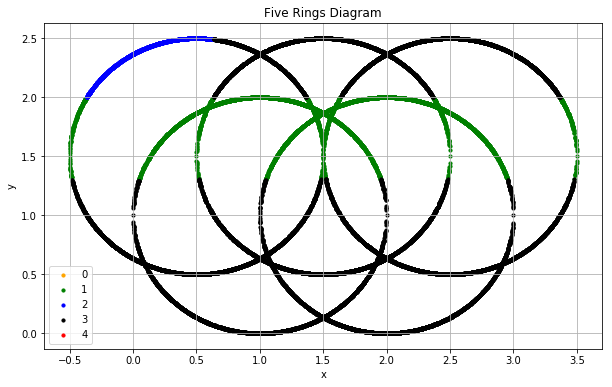

In [21]:
itr=10

x_train=fiveRingDataFrame[['x','y']].dropna()

y_train=fiveRingDataFrame['ring']


adaptiveBoost=Ada_Boosting(itr,x_train,y_train)


New Accuracy:  0.5358820589705147
Accuracy:  0.5358820589705148
Misclassification:  0.46411794102948534
Rase: 0.5507919
New Accuracy:  0.5173267895812695
Accuracy:  0.5173267895813269
Misclassification:  0.48267321041873046
Rase: 0.6369474
New Accuracy:  0.7034250477896381
Accuracy:  0.7034250477895422
Misclassification:  0.2965749522103619
Rase: 0.5805955
New Accuracy:  0.5554440982843778
Accuracy:  0.5554440982842105
Misclassification:  0.4445559017156222
Rase: 0.6433139
New Accuracy:  0.6871657294683897
Accuracy:  0.6871657294682301
Misclassification:  0.3128342705316103
Rase: 0.5802204
New Accuracy:  0.553459539183358
Accuracy:  0.5534595391831955
Misclassification:  0.446540460816642
Rase: 0.6420091
New Accuracy:  0.6868686013671366
Accuracy:  0.6868686013670047
Misclassification:  0.31313139863286343
Rase: 0.5801019
New Accuracy:  0.5534169692372712
Accuracy:  0.5534169692372682
Misclassification:  0.44658303076272876
Rase: 0.6419795
New Accuracy:  0.6868625701818956
Accuracy:  0

New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5

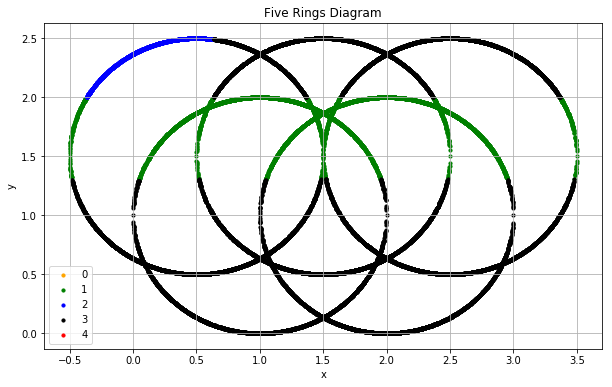

In [221]:
itr=100

x_train=fiveRingDataFrame[['x','y']].dropna()

y_train=fiveRingDataFrame['ring']


adaptiveBoost=Ada_Boosting(itr,x_train,y_train)


New Accuracy:  0.5358820589705147
Accuracy:  0.5358820589705148
Misclassification:  0.46411794102948534
Rase: 0.5507919
New Accuracy:  0.5173267895812695
Accuracy:  0.5173267895813269
Misclassification:  0.48267321041873046
Rase: 0.6369474
New Accuracy:  0.7034250477896381
Accuracy:  0.7034250477895422
Misclassification:  0.2965749522103619
Rase: 0.5805955
New Accuracy:  0.5554440982843778
Accuracy:  0.5554440982842105
Misclassification:  0.4445559017156222
Rase: 0.6433139
New Accuracy:  0.6871657294683897
Accuracy:  0.6871657294682301
Misclassification:  0.3128342705316103
Rase: 0.5802204
New Accuracy:  0.553459539183358
Accuracy:  0.5534595391831955
Misclassification:  0.446540460816642
Rase: 0.6420091
New Accuracy:  0.6868686013671366
Accuracy:  0.6868686013670047
Misclassification:  0.31313139863286343
Rase: 0.5801019
New Accuracy:  0.5534169692372712
Accuracy:  0.5534169692372682
Misclassification:  0.44658303076272876
Rase: 0.6419795
New Accuracy:  0.6868625701818956
Accuracy:  0

New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5

New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5

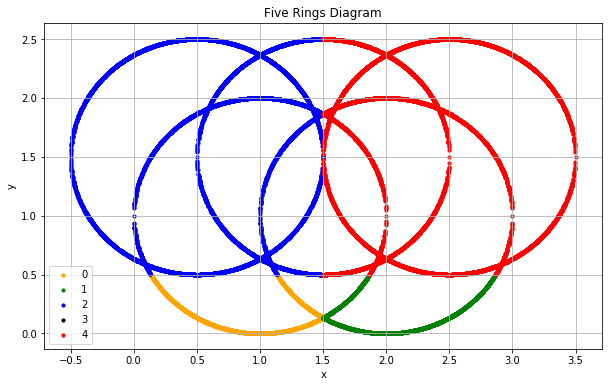

In [222]:
itr=200

x_train=fiveRingDataFrame[['x','y']].dropna()

y_train=fiveRingDataFrame['ring']


adaptiveBoost=Ada_Boosting(itr,x_train,y_train)

New Accuracy:  0.5358820589705147
Accuracy:  0.5358820589705148
Misclassification:  0.46411794102948534
Rase: 0.5507919
New Accuracy:  0.5173267895812695
Accuracy:  0.5173267895813269
Misclassification:  0.48267321041873046
Rase: 0.6369474
New Accuracy:  0.7034250477896381
Accuracy:  0.7034250477895422
Misclassification:  0.2965749522103619
Rase: 0.5805955
New Accuracy:  0.5554440982843778
Accuracy:  0.5554440982842105
Misclassification:  0.4445559017156222
Rase: 0.6433139
New Accuracy:  0.6871657294683897
Accuracy:  0.6871657294682301
Misclassification:  0.3128342705316103
Rase: 0.5802204
New Accuracy:  0.553459539183358
Accuracy:  0.5534595391831955
Misclassification:  0.446540460816642
Rase: 0.6420091
New Accuracy:  0.6868686013671366
Accuracy:  0.6868686013670047
Misclassification:  0.31313139863286343
Rase: 0.5801019
New Accuracy:  0.5534169692372712
Accuracy:  0.5534169692372682
Misclassification:  0.44658303076272876
Rase: 0.6419795
New Accuracy:  0.6868625701818956
Accuracy:  0

New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5

New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5

New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5

New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6

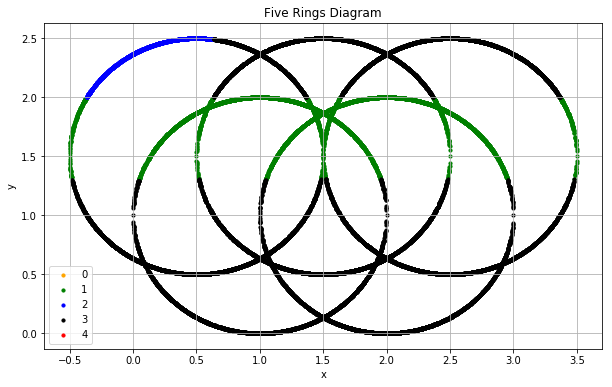

In [223]:
itr=300

x_train=fiveRingDataFrame[['x','y']].dropna()

y_train=fiveRingDataFrame['ring']


adaptiveBoost=Ada_Boosting(itr,x_train,y_train)

New Accuracy:  0.5358820589705147
Accuracy:  0.5358820589705148
Misclassification:  0.46411794102948534
Rase: 0.5507919
New Accuracy:  0.5173267895812695
Accuracy:  0.5173267895813269
Misclassification:  0.48267321041873046
Rase: 0.6369474
New Accuracy:  0.7034250477896381
Accuracy:  0.7034250477895422
Misclassification:  0.2965749522103619
Rase: 0.5805955
New Accuracy:  0.5554440982843778
Accuracy:  0.5554440982842105
Misclassification:  0.4445559017156222
Rase: 0.6433139
New Accuracy:  0.6871657294683897
Accuracy:  0.6871657294682301
Misclassification:  0.3128342705316103
Rase: 0.5802204
New Accuracy:  0.553459539183358
Accuracy:  0.5534595391831955
Misclassification:  0.446540460816642
Rase: 0.6420091
New Accuracy:  0.6868686013671366
Accuracy:  0.6868686013670047
Misclassification:  0.31313139863286343
Rase: 0.5801019
New Accuracy:  0.5534169692372712
Accuracy:  0.5534169692372682
Misclassification:  0.44658303076272876
Rase: 0.6419795
New Accuracy:  0.6868625701818956
Accuracy:  0

New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5

New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5

New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5

New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6

New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6

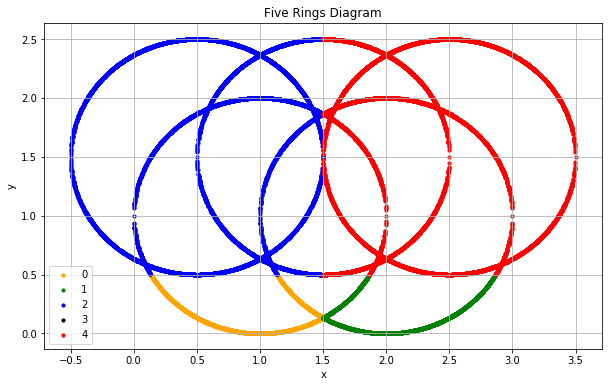

In [224]:
itr=400

x_train=fiveRingDataFrame[['x','y']].dropna()

y_train=fiveRingDataFrame['ring']


adaptiveBoost=Ada_Boosting(itr,x_train,y_train)

New Accuracy:  0.5358820589705147
Accuracy:  0.5358820589705148
Misclassification:  0.46411794102948534
Rase: 0.5507919
New Accuracy:  0.5173267895812695
Accuracy:  0.5173267895813269
Misclassification:  0.48267321041873046
Rase: 0.6369474
New Accuracy:  0.7034250477896381
Accuracy:  0.7034250477895422
Misclassification:  0.2965749522103619
Rase: 0.5805955
New Accuracy:  0.5554440982843778
Accuracy:  0.5554440982842105
Misclassification:  0.4445559017156222
Rase: 0.6433139
New Accuracy:  0.6871657294683897
Accuracy:  0.6871657294682301
Misclassification:  0.3128342705316103
Rase: 0.5802204
New Accuracy:  0.553459539183358
Accuracy:  0.5534595391831955
Misclassification:  0.446540460816642
Rase: 0.6420091
New Accuracy:  0.6868686013671366
Accuracy:  0.6868686013670047
Misclassification:  0.31313139863286343
Rase: 0.5801019
New Accuracy:  0.5534169692372712
Accuracy:  0.5534169692372682
Misclassification:  0.44658303076272876
Rase: 0.6419795
New Accuracy:  0.6868625701818956
Accuracy:  0

New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5

New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5

New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5

New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6

New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6

New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6

New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5

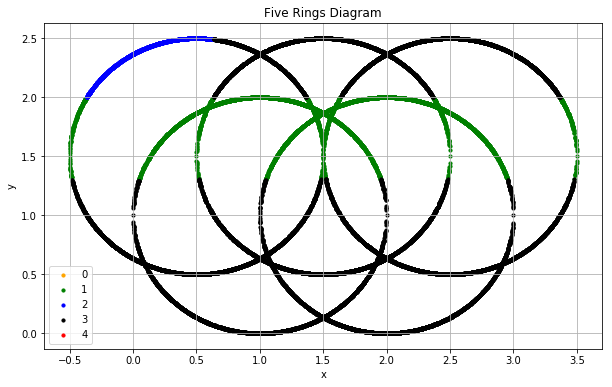

In [225]:
itr=500

x_train=fiveRingDataFrame[['x','y']].dropna()

y_train=fiveRingDataFrame['ring']


adaptiveBoost=Ada_Boosting(itr,x_train,y_train)

New Accuracy:  0.5358820589705147
Accuracy:  0.5358820589705148
Misclassification:  0.46411794102948534
Rase: 0.5507919
New Accuracy:  0.5173267895812695
Accuracy:  0.5173267895813269
Misclassification:  0.48267321041873046
Rase: 0.6369474
New Accuracy:  0.7034250477896381
Accuracy:  0.7034250477895422
Misclassification:  0.2965749522103619
Rase: 0.5805955
New Accuracy:  0.5554440982843778
Accuracy:  0.5554440982842105
Misclassification:  0.4445559017156222
Rase: 0.6433139
New Accuracy:  0.6871657294683897
Accuracy:  0.6871657294682301
Misclassification:  0.3128342705316103
Rase: 0.5802204
New Accuracy:  0.553459539183358
Accuracy:  0.5534595391831955
Misclassification:  0.446540460816642
Rase: 0.6420091
New Accuracy:  0.6868686013671366
Accuracy:  0.6868686013670047
Misclassification:  0.31313139863286343
Rase: 0.5801019
New Accuracy:  0.5534169692372712
Accuracy:  0.5534169692372682
Misclassification:  0.44658303076272876
Rase: 0.6419795
New Accuracy:  0.6868625701818956
Accuracy:  0

New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5

New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5

New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5

New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6

New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6

New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6

New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5

New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5

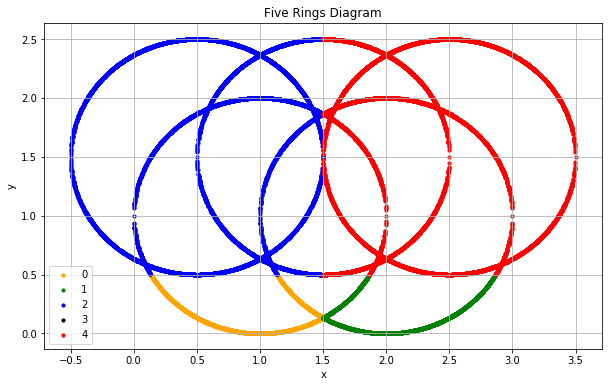

In [226]:
itr=600

x_train=fiveRingDataFrame[['x','y']].dropna()

y_train=fiveRingDataFrame['ring']


adaptiveBoost=Ada_Boosting(itr,x_train,y_train)

New Accuracy:  0.5358820589705147
Accuracy:  0.5358820589705148
Misclassification:  0.46411794102948534
Rase: 0.5507919
New Accuracy:  0.5173267895812695
Accuracy:  0.5173267895813269
Misclassification:  0.48267321041873046
Rase: 0.6369474
New Accuracy:  0.7034250477896381
Accuracy:  0.7034250477895422
Misclassification:  0.2965749522103619
Rase: 0.5805955
New Accuracy:  0.5554440982843778
Accuracy:  0.5554440982842105
Misclassification:  0.4445559017156222
Rase: 0.6433139
New Accuracy:  0.6871657294683897
Accuracy:  0.6871657294682301
Misclassification:  0.3128342705316103
Rase: 0.5802204
New Accuracy:  0.553459539183358
Accuracy:  0.5534595391831955
Misclassification:  0.446540460816642
Rase: 0.6420091
New Accuracy:  0.6868686013671366
Accuracy:  0.6868686013670047
Misclassification:  0.31313139863286343
Rase: 0.5801019
New Accuracy:  0.5534169692372712
Accuracy:  0.5534169692372682
Misclassification:  0.44658303076272876
Rase: 0.6419795
New Accuracy:  0.6868625701818956
Accuracy:  0

New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789


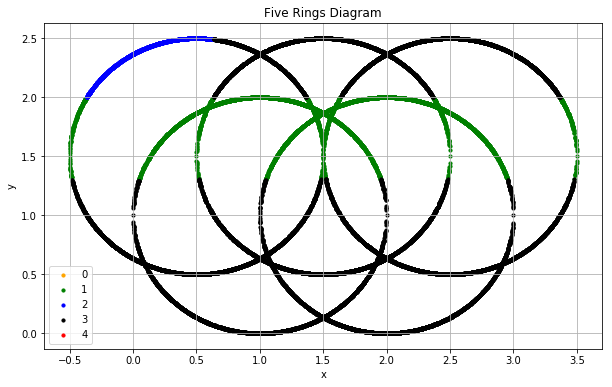

In [227]:
itr=700

x_train=fiveRingDataFrame[['x','y']].dropna()

y_train=fiveRingDataFrame['ring']


adaptiveBoost=Ada_Boosting(itr,x_train,y_train)

New Accuracy:  0.5358820589705147
Accuracy:  0.5358820589705148
Misclassification:  0.46411794102948534
Rase: 0.5507919
New Accuracy:  0.5173267895812695
Accuracy:  0.5173267895813269
Misclassification:  0.48267321041873046
Rase: 0.6369474
New Accuracy:  0.7034250477896381
Accuracy:  0.7034250477895422
Misclassification:  0.2965749522103619
Rase: 0.5805955
New Accuracy:  0.5554440982843778
Accuracy:  0.5554440982842105
Misclassification:  0.4445559017156222
Rase: 0.6433139
New Accuracy:  0.6871657294683897
Accuracy:  0.6871657294682301
Misclassification:  0.3128342705316103
Rase: 0.5802204
New Accuracy:  0.553459539183358
Accuracy:  0.5534595391831955
Misclassification:  0.446540460816642
Rase: 0.6420091
New Accuracy:  0.6868686013671366
Accuracy:  0.6868686013670047
Misclassification:  0.31313139863286343
Rase: 0.5801019
New Accuracy:  0.5534169692372712
Accuracy:  0.5534169692372682
Misclassification:  0.44658303076272876
Rase: 0.6419795
New Accuracy:  0.6868625701818956
Accuracy:  0

New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5

New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5

New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5

New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6

New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6

New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6

New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5

New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5

New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5

New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6

New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6

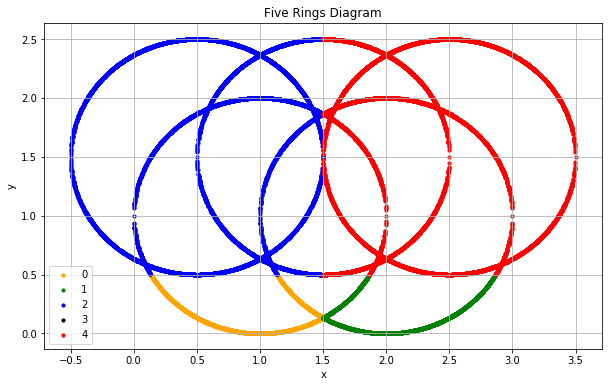

In [228]:
itr=800

x_train=fiveRingDataFrame[['x','y']].dropna()

y_train=fiveRingDataFrame['ring']


adaptiveBoost=Ada_Boosting(itr,x_train,y_train)

New Accuracy:  0.5358820589705147
Accuracy:  0.5358820589705148
Misclassification:  0.46411794102948534
Rase: 0.5507919
New Accuracy:  0.5173267895812695
Accuracy:  0.5173267895813269
Misclassification:  0.48267321041873046
Rase: 0.6369474
New Accuracy:  0.7034250477896381
Accuracy:  0.7034250477895422
Misclassification:  0.2965749522103619
Rase: 0.5805955
New Accuracy:  0.5554440982843778
Accuracy:  0.5554440982842105
Misclassification:  0.4445559017156222
Rase: 0.6433139
New Accuracy:  0.6871657294683897
Accuracy:  0.6871657294682301
Misclassification:  0.3128342705316103
Rase: 0.5802204
New Accuracy:  0.553459539183358
Accuracy:  0.5534595391831955
Misclassification:  0.446540460816642
Rase: 0.6420091
New Accuracy:  0.6868686013671366
Accuracy:  0.6868686013670047
Misclassification:  0.31313139863286343
Rase: 0.5801019
New Accuracy:  0.5534169692372712
Accuracy:  0.5534169692372682
Misclassification:  0.44658303076272876
Rase: 0.6419795
New Accuracy:  0.6868625701818956
Accuracy:  0

New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5

New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5

New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5

New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6

New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6

New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6

New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5

New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5

New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5

New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6

New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6

New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6

New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789


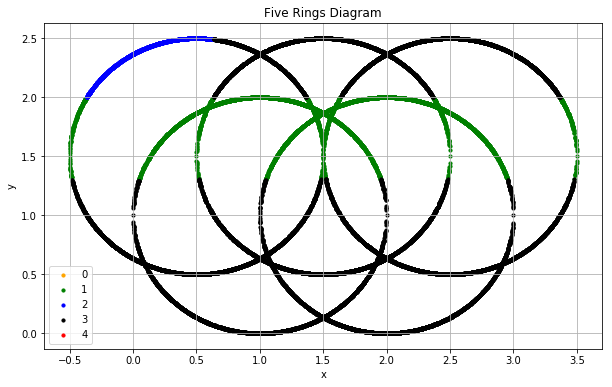

In [229]:
itr=900

x_train=fiveRingDataFrame[['x','y']].dropna()

y_train=fiveRingDataFrame['ring']


adaptiveBoost=Ada_Boosting(itr,x_train,y_train)

New Accuracy:  0.5358820589705147
Accuracy:  0.5358820589705148
Misclassification:  0.46411794102948534
Rase: 0.5507919
New Accuracy:  0.5173267895812695
Accuracy:  0.5173267895813269
Misclassification:  0.48267321041873046
Rase: 0.6369474
New Accuracy:  0.7034250477896381
Accuracy:  0.7034250477895422
Misclassification:  0.2965749522103619
Rase: 0.5805955
New Accuracy:  0.5554440982843778
Accuracy:  0.5554440982842105
Misclassification:  0.4445559017156222
Rase: 0.6433139
New Accuracy:  0.6871657294683897
Accuracy:  0.6871657294682301
Misclassification:  0.3128342705316103
Rase: 0.5802204
New Accuracy:  0.553459539183358
Accuracy:  0.5534595391831955
Misclassification:  0.446540460816642
Rase: 0.6420091
New Accuracy:  0.6868686013671366
Accuracy:  0.6868686013670047
Misclassification:  0.31313139863286343
Rase: 0.5801019
New Accuracy:  0.5534169692372712
Accuracy:  0.5534169692372682
Misclassification:  0.44658303076272876
Rase: 0.6419795
New Accuracy:  0.6868625701818956
Accuracy:  0

New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5

New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5

New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5

New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6

New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6

New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6

New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5

New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5

New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5

New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6

New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6

New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6

New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
Number of iterations 900
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.553416

New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5534160927178592
Misclassification:  0.4465839072820853
Rase: 0.6419789
New Accuracy:  0.6868624459575241
Accuracy:  0.6868624459574755
Misclassification:  0.3131375540424759
Rase: 0.5800995
New Accuracy:  0.5534160927179147
Accuracy:  0.5

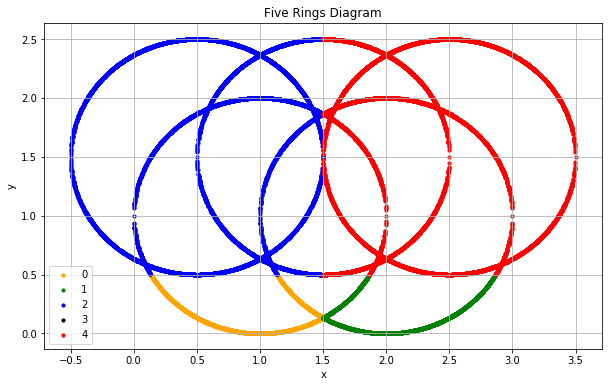

In [230]:
itr=1000

x_train=fiveRingDataFrame[['x','y']].dropna()

y_train=fiveRingDataFrame['ring']


adaptiveBoost=Ada_Boosting(itr,x_train,y_train)